In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import joblib

### Part 1: Load a dataset and Look at the summary of the dataset

In [3]:
# Read the dataset
df = pd.read_csv("glass.csv")
# First 5 rows of dataset
print (df.head())

   Id_number       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  \
0          1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   
1          2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   
2          3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   
3          4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   
4          5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   

   Type_of_glass  
0              1  
1              1  
2              1  
3              1  
4              1  


In [5]:
# Shape of dataset
print (df.shape)

(214, 11)


In [6]:
# Data columns values
print (df.columns)

Index(['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glass'],
      dtype='object')


In [7]:
# Data types of each column 
print (df.dtypes)

Id_number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object


In [8]:
# Basic statistics of all numeric columns
print (df.select_dtypes("float64").describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000    0.000000  
50%   

### Part 2: EDA (Exploratory Data Analysis) of the dataset

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


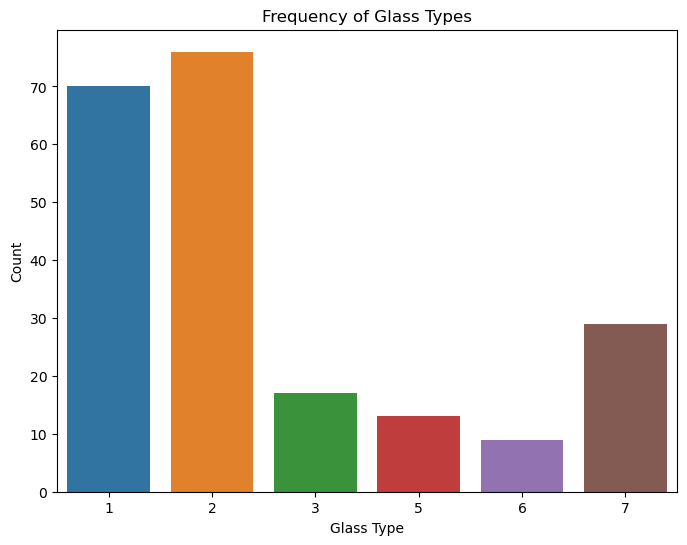

In [15]:
# Bar chart
glass_type_counts = df['Type_of_glass'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=glass_type_counts.index, y=glass_type_counts.values)
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.title('Frequency of Glass Types')
plt.show()

[1 2 3 5 6 7]


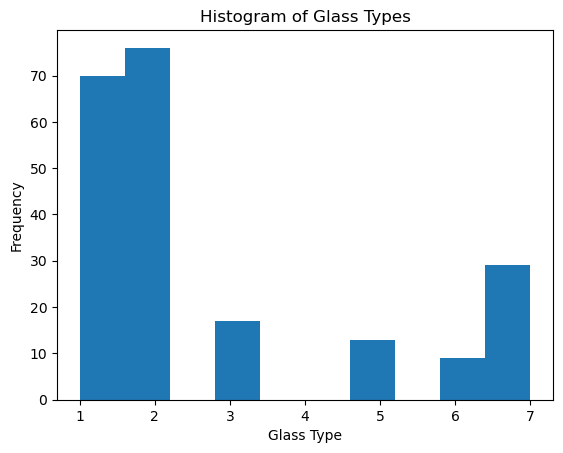

In [16]:
# Histogram
plt.hist(df["Type_of_glass"])
plt.xlabel("Glass Type")
plt.ylabel("Frequency")
plt.title("Histogram of Glass Types")
# Count different values
print (pd.unique(df["Type_of_glass"]))
plt.show()

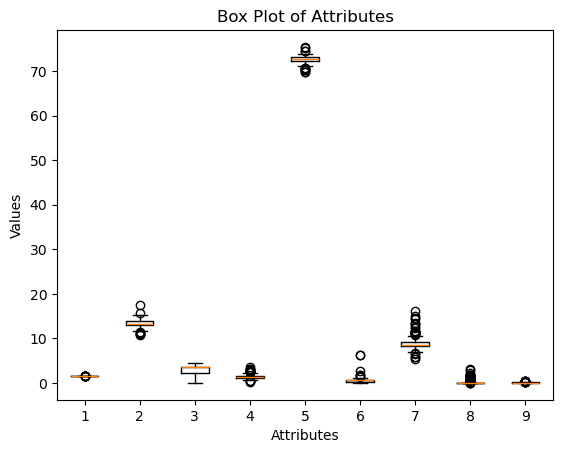

In [17]:
# Box plot for each attribute
plt.boxplot(df.select_dtypes('float64'))
plt.xlabel("Attributes")
plt.ylabel("Values")
plt.title("Box Plot of Attributes")
plt.show()

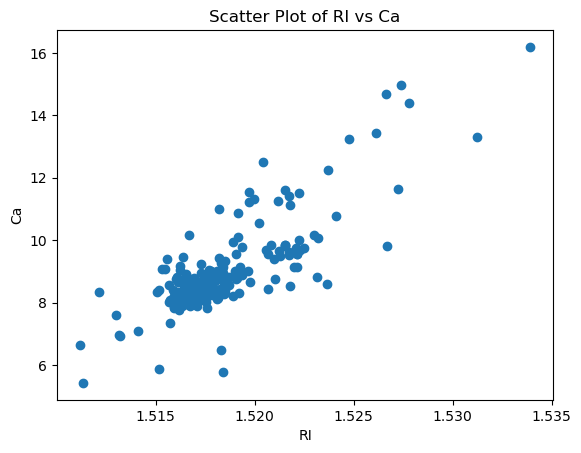

In [18]:
# Scatter plot
plt.scatter (df['RI'],df['Ca'])
plt.xlabel("RI")
plt.ylabel("Ca")
plt.title("Scatter Plot of RI vs Ca")
plt.show()

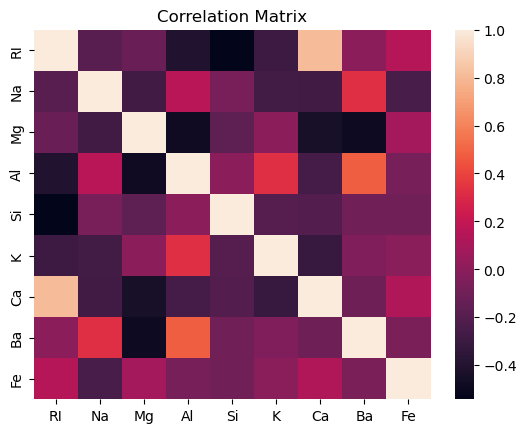

In [19]:
# Correlation matrix
correlation_matrix = df.drop(["Type_of_glass","Id_number"], axis=1).corr()
sns.heatmap(correlation_matrix) # Drop RI or Ca column (RI)
plt.title("Correlation Matrix")
plt.show()

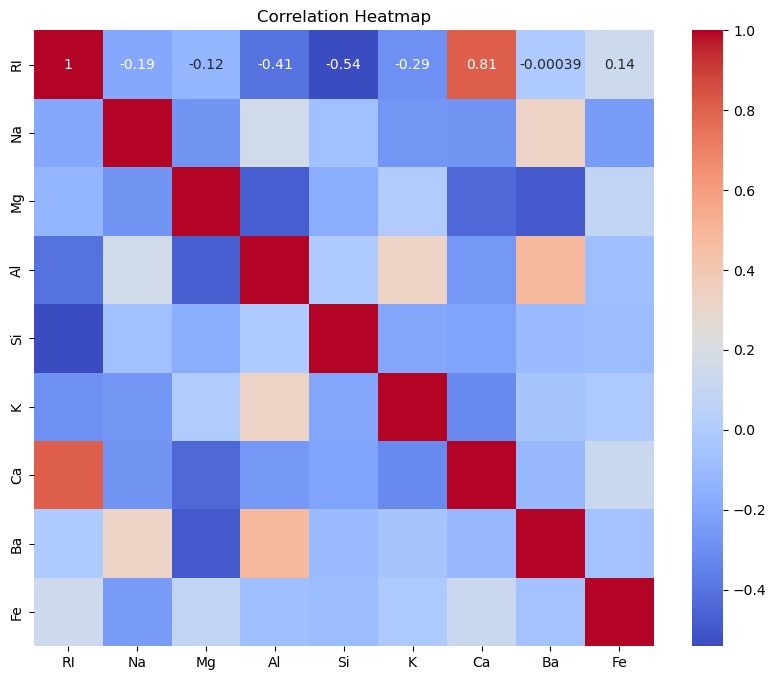

In [20]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Part 3: Train and Build Machine Learning Models

In [21]:
# Drop RI columns
if "RI" in df.columns:
    df.drop("RI", axis=1, inplace=True)
print (df.columns)

Index(['Id_number', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glass'],
      dtype='object')


In [23]:
# Define features and label column
X = df.drop("Type_of_glass", axis=1)
y = df["Type_of_glass"]
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, stratify=y)

# Standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression Model Classification Report:")
print(metrics.classification_report(y_pred, y_test))

Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.87      0.87      0.87        15
           3       0.33      0.50      0.40         2
           5       1.00      0.75      0.86         4
           6       1.00      0.67      0.80         3
           7       0.83      1.00      0.91         5

    accuracy                           0.88        43
   macro avg       0.84      0.80      0.81        43
weighted avg       0.90      0.88      0.89        43



In [24]:
# Train a random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf_classifier = rf_classifier.predict(X_test)
print("Random Forest Classifier Model Classification Report:")
print (metrics.classification_report(y_test, y_pred_rf_classifier))

Random Forest Classifier Model Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.94      1.00      0.97        15
           3       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      0.83      0.91         6

    accuracy                           0.95        43
   macro avg       0.93      0.92      0.92        43
weighted avg       0.95      0.95      0.95        43



In [25]:
# Train a K-nearest neighbors classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn_classifier = knn_classifier.predict(X_test)
print("K-nearest neighbors Classifier Model Classification Report:")
print(metrics.classification_report(y_test, y_pred_knn_classifier))

K-nearest neighbors Classifier Model Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.87      0.87      0.87        15
           3       0.50      0.33      0.40         3
           5       0.50      0.33      0.40         3
           6       0.67      1.00      0.80         2
           7       0.71      0.83      0.77         6

    accuracy                           0.84        43
   macro avg       0.71      0.73      0.71        43
weighted avg       0.83      0.84      0.83        43



### Part 4: Model Evaluation

In [31]:
# Logistic Regression Model Evaluation
classification_report_log_reg = metrics.classification_report(y_test, y_pred)
confusion_matrix_log_reg = metrics.confusion_matrix(y_test, y_pred)
cohen_kappa_log_reg = metrics.cohen_kappa_score(y_test, y_pred)
cross_entropy_log_reg = metrics.log_loss(y_test, log_reg.predict_proba(X_test))
mcc_log_reg = metrics.matthews_corrcoef(y_test, y_pred)

print("Logistic Regression Model Evaluation:")
print(classification_report_log_reg)
print("Confusion Matrix:")
print(confusion_matrix_log_reg)
print("Cohen's Kappa Score:", cohen_kappa_log_reg)
print("Cross-Entropy:", cross_entropy_log_reg)
print("Matthews Correlation Coefficient (MCC):", mcc_log_reg)

Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.87      0.87      0.87        15
           3       0.50      0.33      0.40         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.88        43
   macro avg       0.80      0.84      0.81        43
weighted avg       0.89      0.88      0.88        43

Confusion Matrix:
[[14  0  0  0  0  0]
 [ 0 13  0  1  1  0]
 [ 0  2  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  1  0  0  5]]
Cohen's Kappa Score: 0.8435225618631732
Cross-Entropy: 0.41258474058392447
Matthews Correlation Coefficient (MCC): 0.8447530841247407


In [32]:
# Random Forest Classifier Model Evaluation
classification_report_rf_classifier = metrics.classification_report(y_test, y_pred_rf_classifier)
confusion_matrix_rf_classifier = metrics.confusion_matrix(y_test, y_pred_rf_classifier)
cohen_kappa_rf_classifier = metrics.cohen_kappa_score(y_test, y_pred_rf_classifier)
cross_entropy_rf_classifier = metrics.log_loss(y_test, rf_classifier.predict_proba(X_test))
mcc_rf_classifier = metrics.matthews_corrcoef(y_test, y_pred_rf_classifier)

print("Random Forest Classifier Model Evaluation:")
print(classification_report_rf_classifier)
print("Confusion Matrix:")
print(confusion_matrix_rf_classifier)
print("Cohen's Kappa Score:", cohen_kappa_rf_classifier)
print("Cross-Entropy:", cross_entropy_rf_classifier)
print("Matthews Correlation Coefficient (MCC):", mcc_rf_classifier)

Random Forest Classifier Model Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.94      1.00      0.97        15
           3       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      0.83      0.91         6

    accuracy                           0.95        43
   macro avg       0.93      0.92      0.92        43
weighted avg       0.95      0.95      0.95        43

Confusion Matrix:
[[14  0  0  0  0  0]
 [ 0 15  0  0  0  0]
 [ 0  1  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  1  0  0  5]]
Cohen's Kappa Score: 0.9368111682586333
Cross-Entropy: 0.22148004858129644
Matthews Correlation Coefficient (MCC): 0.9375253443451743


In [33]:
# K-nearest neighbors Classifier Model Evaluation
classification_report_knn_classifier = metrics.classification_report(y_test, y_pred_knn_classifier)
confusion_matrix_knn_classifier = metrics.confusion_matrix(y_test, y_pred_knn_classifier)
cohen_kappa_knn_classifier = metrics.cohen_kappa_score(y_test, y_pred_knn_classifier)
cross_entropy_knn_classifier = metrics.log_loss(y_test, knn_classifier.predict_proba(X_test))
mcc_knn_classifier = metrics.matthews_corrcoef(y_test, y_pred_knn_classifier)

print("K-nearest neighbors Classifier Model Evaluation:")
print(classification_report_knn_classifier)
print("Confusion Matrix:")
print(confusion_matrix_knn_classifier)
print("Cohen's Kappa Score:", cohen_kappa_knn_classifier)
print("Cross-Entropy:", cross_entropy_knn_classifier)
print("Matthews Correlation Coefficient (MCC):", mcc_knn_classifier)

K-nearest neighbors Classifier Model Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.87      0.87      0.87        15
           3       0.50      0.33      0.40         3
           5       0.50      0.33      0.40         3
           6       0.67      1.00      0.80         2
           7       0.71      0.83      0.77         6

    accuracy                           0.84        43
   macro avg       0.71      0.73      0.71        43
weighted avg       0.83      0.84      0.83        43

Confusion Matrix:
[[14  0  0  0  0  0]
 [ 0 13  0  1  1  0]
 [ 0  2  1  0  0  0]
 [ 0  0  0  1  0  2]
 [ 0  0  0  0  2  0]
 [ 0  0  1  0  0  5]]
Cohen's Kappa Score: 0.7799707602339181
Cross-Entropy: 1.1220418121822644
Matthews Correlation Coefficient (MCC): 0.7811160868434681


### Part 5: Make Predictions

In [34]:
# Save the trained models
joblib.dump(log_reg, 'logistic_regression_model.joblib')
joblib.dump(rf_classifier, 'random_forest_classifier_model.joblib')
joblib.dump(knn_classifier, 'knn_classifier_model.joblib')

['knn_classifier_model.joblib']

In [35]:
# Load the saved models
loaded_log_reg = joblib.load('logistic_regression_model.joblib')
loaded_rf_classifier = joblib.load('random_forest_classifier_model.joblib')
loaded_knn_classifier = joblib.load('knn_classifier_model.joblib')

In [ ]:
# Make predictions with new data
new_data = scaler.transform(new_data)  # Assuming you have new data to make predictions on
predictions_log_reg = loaded_log_reg.predict(new_data)
predictions_rf_classifier = loaded_rf_classifier.predict(new_data)
predictions_knn_classifier = loaded_knn_classifier.predict(new_data)

# Print the predictions
print("Predictions using Logistic Regression Model:", predictions_log_reg)
print("Predictions using Random Forest Classifier Model:", predictions_rf_classifier)
print("Predictions using K-nearest neighbors Classifier Model:", predictions_knn_classifier)